In [213]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
# check data 
wine_full = pd.read_csv('../../additional_resources/datasets/Wine Quality/wine.csv')
wine_full

index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0         0            7.4              0.70         0.00             1.9   
1         1            7.8              0.88         0.00             2.6   
2         2            7.8              0.76         0.04             2.3   
3         3           11.2              0.28         0.56             1.9   
4         4            7.4              0.70         0.00             1.9   
...     ...            ...               ...          ...             ...   
6492   4893            6.2              0.21         0.29             1.6   
6493   4894            6.6              0.32         0.36             8.0   
6494   4895            6.5              0.24         0.19             1.2   
6495   4896            5.5              0.29         0.30             1.1   
6496   4897            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
6492      0.039                 24.0                  92.0  0.99114  3.27   
6493      0.047                 57.0                 168.0  0.99490  3.15   
6494      0.041                 30.0                 111.0  0.99254  2.99   
6495      0.022                 20.0                 110.0  0.98869  3.34   
6496      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  quality  
0          0.56      9.4        5  
1          0.68      9.8        5  
2          0.65      9.8        5  
3          0.58      9.8        6  
4          0.56      9.4        5  
...         ...      ...      ...  
6492       0.50     11.2        6  
6493       0.46      9.6        5  
6494       0.46      9.4        6  
6495       0.38     12.8        7  
6496       0.32     11.8        6  

[6497 rows x 13 columns]

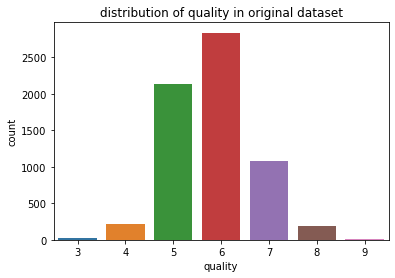

In [215]:
plt.figsize=(8,6)
sns.countplot(x='quality', data=wine_full)
plt.title('distribution of quality in original dataset')
plt.savefig('visuals/count_quality_original.png')

In [216]:
wine_full.drop('index', axis=1, inplace=True)

In [217]:
wine_full

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
6492     11.2        6  
6493      9.6        5  
6494      9.4        6  
6495     12.8        7  
6496     11.8        6  

[6497 rows x 12 columns]

In [218]:
wine_full.duplicated().sum()

1179

In [219]:
wine_full.drop_duplicates(inplace=True)
wine_full.reset_index(inplace=True, drop=True)

In [220]:
wine_full

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5313            6.2              0.21         0.29             1.6      0.039   
5314            6.6              0.32         0.36             8.0      0.047   
5315            6.5              0.24         0.19             1.2      0.041   
5316            5.5              0.29         0.30             1.1      0.022   
5317            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5313                 24.0                  92.0  0.99114  3.27       0.50   
5314                 57.0                 168.0  0.99490  3.15       0.46   
5315                 30.0                 111.0  0.99254  2.99       0.46   
5316                 20.0                 110.0  0.98869  3.34       0.38   
5317                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
5313     11.2        6  
5314      9.6        5  
5315      9.4        6  
5316     12.8        7  
5317     11.8        6  

[5318 rows x 12 columns]

In [221]:
wine_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318 entries, 0 to 5317
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5318 non-null   float64
 1   volatile acidity      5318 non-null   float64
 2   citric acid           5318 non-null   float64
 3   residual sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free sulfur dioxide   5318 non-null   float64
 6   total sulfur dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 498.7 KB


In [222]:
wine_full = wine_full.sample(frac=1).reset_index(drop=True) # Shuffle dataframe
wine_full.to_csv('data/wine_full.csv', index=False)

In [223]:
wine_full.isna().sum().sum()

0

In [224]:
wine_full.quality.value_counts()

6    2323
5    1751
7     855
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

In [225]:
wine_full.quality.mean()

5.795599849567506

In [226]:
from sklearn.preprocessing import StandardScaler
cols = wine_full.columns[:-1]
y = wine_full.quality
X = wine_full[cols]
wine_full = StandardScaler().fit_transform(X)
wine_full = pd.DataFrame(wine_full, columns=cols)
wine_full['quality'] = y
wine_full

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.617983          0.688442    -1.620805       -0.033244  -0.290289   
1         -0.390650          0.094083    -0.397669        0.633390  -0.615834   
2         -0.845315         -0.440840    -0.261765        1.055591  -0.398804   
3          0.291347         -0.500276     1.776795        0.633390  -0.425933   
4         -1.603091          0.985621    -0.941285       -0.655435  -0.398804   
...             ...               ...          ...             ...        ...   
5313      -1.148426         -0.381405     0.281851       -0.722099  -0.425933   
5314      -0.239095         -0.084225    -0.057909        0.588948  -0.453061   
5315      -0.314873         -0.500276     0.010043        0.433400  -0.425933   
5316      -0.466428          0.391262    -0.533573       -0.033244   2.748125   
5317      -0.314873         -0.678584     1.097275       -0.788762  -0.561576   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.222974              0.526471 -0.029084 -0.777108   
1                0.503830              0.156613 -1.128481 -1.462944   
2                1.739599              0.191838  0.264313 -0.527713   
3                1.795770              1.160514  0.695978 -0.964154   
4               -0.788109             -0.230858 -0.720423  1.467446   
...                   ...                   ...       ...       ...   
5313             0.447659             -0.424593 -1.523050  0.282820   
5314            -0.057882              0.367961 -0.767636 -0.714759   
5315             0.447659              0.068552 -0.214565  0.158123   
5316             0.953201              0.526471  0.058598 -0.340667   
5317             0.279145              0.896330 -0.983469 -0.278318   

      sulphates   alcohol  quality  
0      0.177632 -0.463146        5  
1     -1.558727  1.392060        7  
2     -0.757331 -0.294490        6  
3     -1.024463 -1.306421        5  
4      2.247906  1.982353        7  
...         ...       ...      ...  
5313   2.982519  1.139078        7  
5314   0.244415  1.476388        5  
5315  -0.089500  0.211475        6  
5316  -0.289849 -0.969111        5  
5317  -0.556982  0.633113        6  

[5318 rows x 12 columns]

In [227]:
wine_binary = wine_full.copy()

In [228]:
# make target binary 
target_mean = wine_binary.quality.mean()
wine_binary.loc[wine_binary.quality < target_mean, 'quality'] = 0
wine_binary.loc[wine_binary.quality > target_mean, 'quality'] = 1
wine_binary

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.617983          0.688442    -1.620805       -0.033244  -0.290289   
1         -0.390650          0.094083    -0.397669        0.633390  -0.615834   
2         -0.845315         -0.440840    -0.261765        1.055591  -0.398804   
3          0.291347         -0.500276     1.776795        0.633390  -0.425933   
4         -1.603091          0.985621    -0.941285       -0.655435  -0.398804   
...             ...               ...          ...             ...        ...   
5313      -1.148426         -0.381405     0.281851       -0.722099  -0.425933   
5314      -0.239095         -0.084225    -0.057909        0.588948  -0.453061   
5315      -0.314873         -0.500276     0.010043        0.433400  -0.425933   
5316      -0.466428          0.391262    -0.533573       -0.033244   2.748125   
5317      -0.314873         -0.678584     1.097275       -0.788762  -0.561576   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.222974              0.526471 -0.029084 -0.777108   
1                0.503830              0.156613 -1.128481 -1.462944   
2                1.739599              0.191838  0.264313 -0.527713   
3                1.795770              1.160514  0.695978 -0.964154   
4               -0.788109             -0.230858 -0.720423  1.467446   
...                   ...                   ...       ...       ...   
5313             0.447659             -0.424593 -1.523050  0.282820   
5314            -0.057882              0.367961 -0.767636 -0.714759   
5315             0.447659              0.068552 -0.214565  0.158123   
5316             0.953201              0.526471  0.058598 -0.340667   
5317             0.279145              0.896330 -0.983469 -0.278318   

      sulphates   alcohol  quality  
0      0.177632 -0.463146        0  
1     -1.558727  1.392060        1  
2     -0.757331 -0.294490        1  
3     -1.024463 -1.306421        0  
4      2.247906  1.982353        1  
...         ...       ...      ...  
5313   2.982519  1.139078        1  
5314   0.244415  1.476388        0  
5315  -0.089500  0.211475        1  
5316  -0.289849 -0.969111        0  
5317  -0.556982  0.633113        1  

[5318 rows x 12 columns]

In [229]:
X = wine_binary.drop('quality', axis=1)
y = wine_binary.quality
y.value_counts()

1    3331
0    1987
Name: quality, dtype: int64

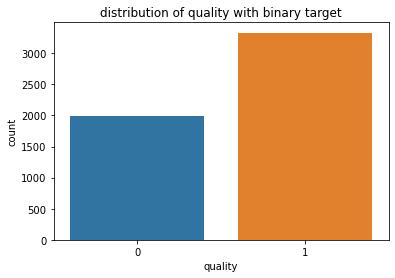

In [230]:
plt.figsize=(8,6)
sns.countplot(x=y, data=wine_binary)
plt.title('distribution of quality with binary target')
plt.savefig('visuals/count_quality_binary.png')

In [231]:
# from collections import Counter
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
# rus = RandomUnderSampler(random_state=42)
# ros = RandomOverSampler(random_state=42)
# X_res, y_res = ros.fit_resample(X, y)
# print('Resampled dataset shape {}'.format(Counter(y_res)))

In [232]:
# split train test 
# train_test_split_fraction = 0.80
# split_index = int(wine_binary.shape[0] * train_test_split_fraction)
# X_train = X[:split_index]
# X_test = X[split_index:]
# y_train = y[:split_index]
# y_test = y[split_index:]

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [234]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4254, 11)
(4254,)
(1064, 11)
(1064,)


In [235]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2665, 0: 1589})
Counter({1: 666, 0: 398})


<AxesSubplot:xlabel='quality', ylabel='count'>

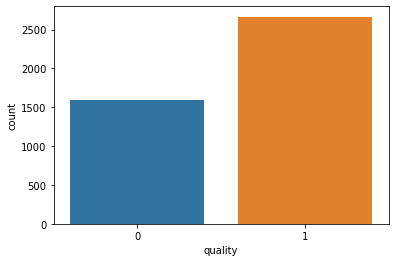

In [236]:
sns.countplot(x=y_train)

In [237]:
# for binary model
model = keras.models.Sequential([
    keras.layers.Dense(6, input_shape=(11,), activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [238]:
model.build()

In [239]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_36 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [240]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [241]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
107/107 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.6594 - val_loss: 0.6169 - val_accuracy: 0.6910
Epoch 2/100
107/107 [==============================] - 0s 626us/step - loss: 0.5836 - accuracy: 0.6903 - val_loss: 0.5705 - val_accuracy: 0.7121
Epoch 3/100
107/107 [==============================] - 0s 617us/step - loss: 0.5503 - accuracy: 0.7120 - val_loss: 0.5448 - val_accuracy: 0.7227
Epoch 4/100
107/107 [==============================] - 0s 626us/step - loss: 0.5346 - accuracy: 0.7217 - val_loss: 0.5323 - val_accuracy: 0.7309
Epoch 5/100
107/107 [==============================] - 0s 598us/step - loss: 0.5255 - accuracy: 0.7305 - val_loss: 0.5231 - val_accuracy: 0.7297
Epoch 6/100
107/107 [==============================] - 0s 636us/step - loss: 0.5197 - accuracy: 0.7299 - val_loss: 0.5190 - val_accuracy: 0.7309
Epoch 7/100
107/107 [==============================] - 0s 645us/step - loss: 0.5151 - accuracy: 0.7323 - val_loss: 0.5133 - val_accu

In [242]:
model.save('models/model_v1.h5')
# model = keras.models.load_model('path/to/location')

In [243]:
loss = history.history['loss']
accuracy = history.history['accuracy']

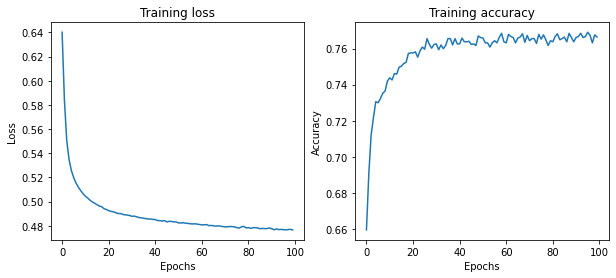

In [244]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

In [245]:
# y_pred = model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
results = model.evaluate(X_test, y_test, batch_size=32)
# print(results)
print(f"Accuracy on test set is {results[1]*100:.2f}%")

34/34 [==============================] - 0s 441us/step - loss: 0.4987 - accuracy: 0.7585
Accuracy on test set is 75.85%


In [246]:
model.evaluate(X_train, y_train)

133/133 [==============================] - 0s 421us/step - loss: 0.4770 - accuracy: 0.7687


[0.4769514799118042, 0.7686883211135864]

In [247]:
type(y_pred)
(unique, counts) = np.unique(y_pred, return_counts=True)
print(unique)
print(counts)

[0 1]
[409 655]


In [248]:
from sklearn.metrics import classification_report

In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       398
           1       0.81      0.80      0.81       666

    accuracy                           0.76      1064
   macro avg       0.74      0.74      0.74      1064
weighted avg       0.76      0.76      0.76      1064



In [250]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_roc_curve, roc_curve, roc_auc_score, precision_recall_curve
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))

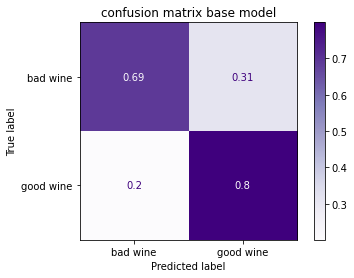

In [251]:
labels = ['bad wine', 'good wine']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, normalize='true'), display_labels=labels)
disp.plot(cmap=plt.cm.Purples)
plt.title('confusion matrix base model')
# plt.show()
plt.savefig('visuals/base_confusionmatrix.png')

In [252]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)

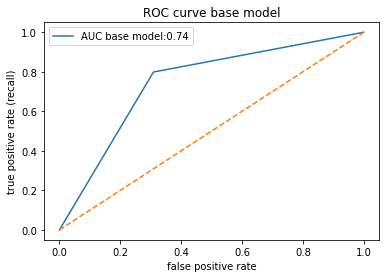

In [253]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend()

roc_auc = round(roc_auc_score(y_test, y_pred), 2)
label_string = 'AUC base model:' + str(roc_auc)
plot_roc_curve(false_pos_rate, true_pos_rate, label=label_string)
plt.title('ROC curve base model')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate (recall)')
plt.savefig('visuals/base_roccurve')
plt.show()

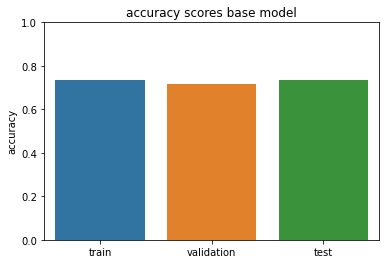

In [254]:
score_labels = ['train', 'validation', 'test'] #, 'f1', 'f1']
scores = [0.734, 0.717, 0.734 ]
models = ['train', 'validation', 'test']
sns.barplot(x=score_labels, y=scores)
plt.ylim([0,1])
plt.title('accuracy scores base model')
plt.ylabel('accuracy')
plt.savefig('visuals/base_accuracies.png')

In [255]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
precisions


array([0.62593985, 0.81221374, 1.        ])

No handles with labels found to put in legend.


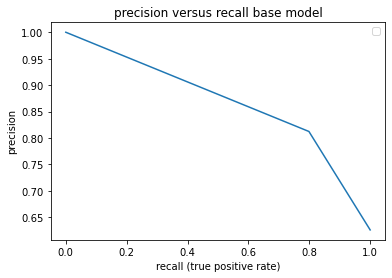

In [256]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
#     plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.plot(recalls, precisions)
    plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.title('precision versus recall base model')
plt.xlabel('recall (true positive rate)')
plt.ylabel('precision')
plt.savefig('visuals/base_precisionvsrecall')
plt.show()

In [257]:
# wine binary drop features selection
wine_binary

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.617983          0.688442    -1.620805       -0.033244  -0.290289   
1         -0.390650          0.094083    -0.397669        0.633390  -0.615834   
2         -0.845315         -0.440840    -0.261765        1.055591  -0.398804   
3          0.291347         -0.500276     1.776795        0.633390  -0.425933   
4         -1.603091          0.985621    -0.941285       -0.655435  -0.398804   
...             ...               ...          ...             ...        ...   
5313      -1.148426         -0.381405     0.281851       -0.722099  -0.425933   
5314      -0.239095         -0.084225    -0.057909        0.588948  -0.453061   
5315      -0.314873         -0.500276     0.010043        0.433400  -0.425933   
5316      -0.466428          0.391262    -0.533573       -0.033244   2.748125   
5317      -0.314873         -0.678584     1.097275       -0.788762  -0.561576   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.222974              0.526471 -0.029084 -0.777108   
1                0.503830              0.156613 -1.128481 -1.462944   
2                1.739599              0.191838  0.264313 -0.527713   
3                1.795770              1.160514  0.695978 -0.964154   
4               -0.788109             -0.230858 -0.720423  1.467446   
...                   ...                   ...       ...       ...   
5313             0.447659             -0.424593 -1.523050  0.282820   
5314            -0.057882              0.367961 -0.767636 -0.714759   
5315             0.447659              0.068552 -0.214565  0.158123   
5316             0.953201              0.526471  0.058598 -0.340667   
5317             0.279145              0.896330 -0.983469 -0.278318   

      sulphates   alcohol  quality  
0      0.177632 -0.463146        0  
1     -1.558727  1.392060        1  
2     -0.757331 -0.294490        1  
3     -1.024463 -1.306421        0  
4      2.247906  1.982353        1  
...         ...       ...      ...  
5313   2.982519  1.139078        1  
5314   0.244415  1.476388        0  
5315  -0.089500  0.211475        1  
5316  -0.289849 -0.969111        0  
5317  -0.556982  0.633113        1  

[5318 rows x 12 columns]

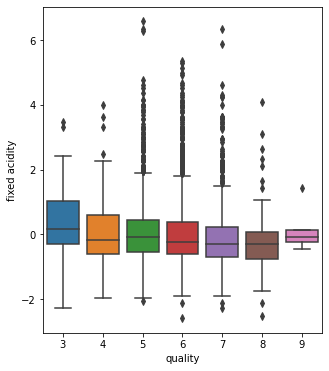

In [258]:
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.boxplot(x='quality', y='fixed acidity', data=wine_full )
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


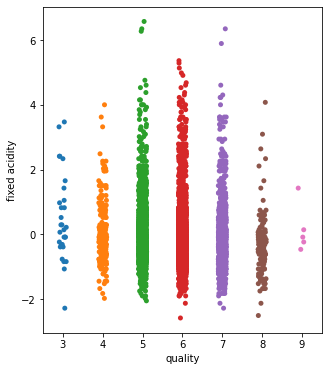

In [259]:
print(wine_binary.columns)
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='fixed acidity', data=wine_full, dodge=True )
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


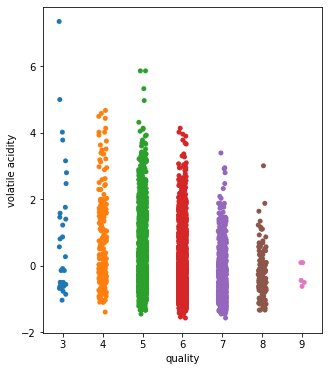

In [260]:
print(wine_binary.columns)
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='volatile acidity', data=wine_full, dodge=True )
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


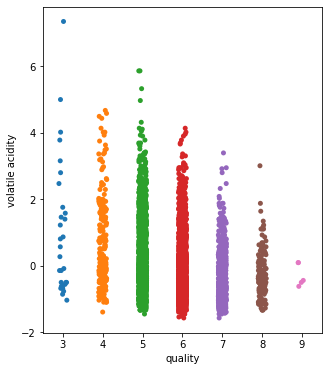

In [261]:
print(wine_binary.columns)
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='volatile acidity', data=wine_full, dodge=True )
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


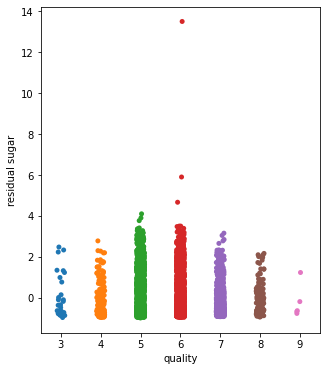

In [262]:
print(wine_binary.columns)
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='residual sugar', data=wine_full, dodge=True )
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


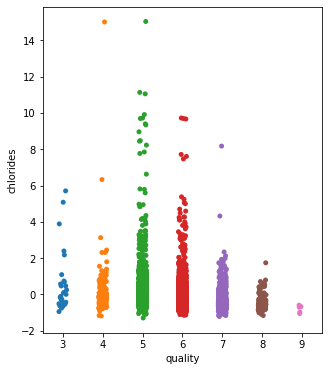

In [263]:
print(wine_binary.columns)
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='chlorides', data=wine_full, dodge=True )
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


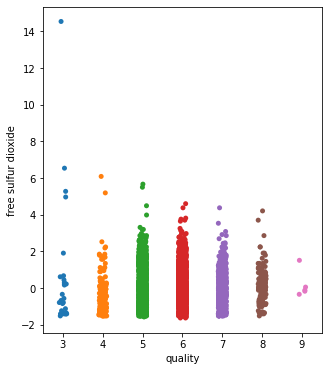

In [264]:
print(wine_binary.columns)
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='free sulfur dioxide', data=wine_full, dodge=True )
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


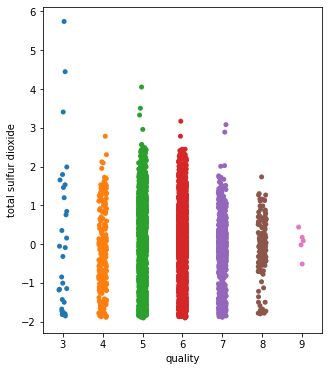

In [265]:
print(wine_binary.columns)
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='total sulfur dioxide', data=wine_full, dodge=True )
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


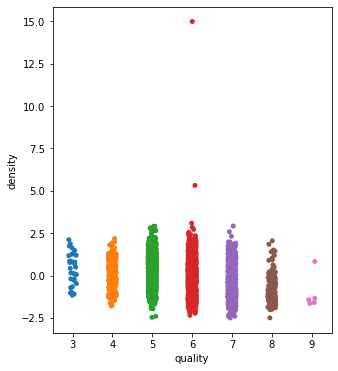

In [266]:
print(wine_binary.columns)
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='density', data=wine_full, dodge=True )
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


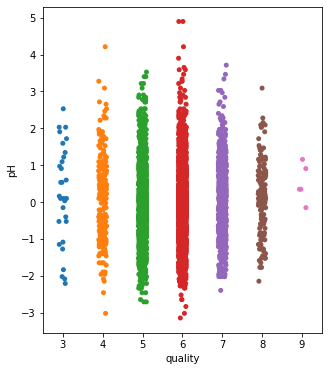

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


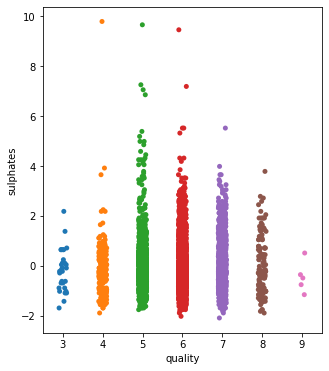

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


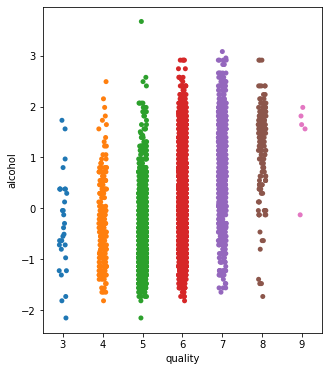

In [267]:
print(wine_binary.columns)
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='pH', data=wine_full, dodge=True )
plt.show()

print(wine_binary.columns)
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='sulphates', data=wine_full, dodge=True )
plt.show()

print(wine_binary.columns)
# for column in wine_binary.columns:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='alcohol', data=wine_full, dodge=True )
plt.show()


In [268]:
wine_feature = wine_full.copy()
wine_feature['mso2'] = wine_feature['free sulfur dioxide'] / (1 + 10**(wine_feature['pH'] - 1.81))

In [269]:
wine_feature.mso2

0       0.222399
1       0.503562
2       1.731642
3       1.792754
4      -0.541876
          ...   
5313    0.434745
5314   -0.057710
5315    0.437898
5316    0.946510
5317    0.276886
Name: mso2, Length: 5318, dtype: float64

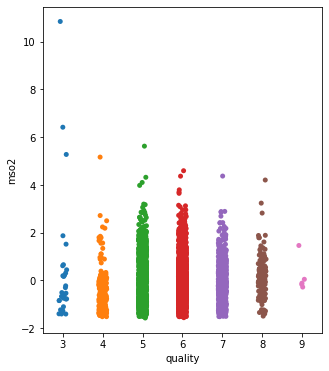

In [270]:
fig = plt.figure(figsize = (5,6))
sns.stripplot(x='quality', y='mso2', data=wine_feature, dodge=True )
plt.show()

In [271]:
from sklearn.manifold import TSNE


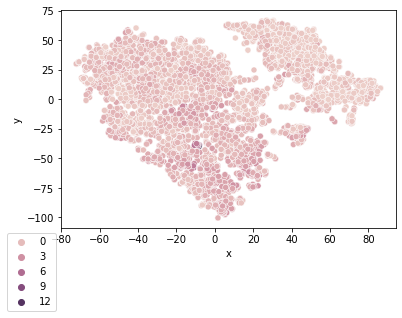

In [272]:
for perplexity in [30]:
    wine_copy = wine_full.copy()
    y = wine_copy.quality
    X = wine_copy.drop('quality', axis=1)
    tsne = TSNE(perplexity=perplexity).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='free sulfur dioxide' )
    plt.legend(bbox_to_anchor=[0, 0])
    plt.show()

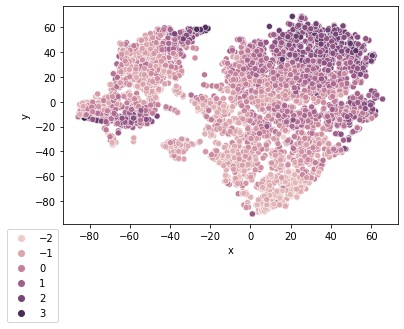

In [273]:
for perplexity in [30]:
    wine_copy = wine_full.copy()
    y = wine_copy.quality
    X = wine_copy.drop('quality', axis=1)
    tsne = TSNE(perplexity=perplexity, random_state=86).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    
    wine_copy['mso2'] = wine_feature.mso2
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='alcohol' )
    plt.legend(bbox_to_anchor=[0, 0])
    plt.show()

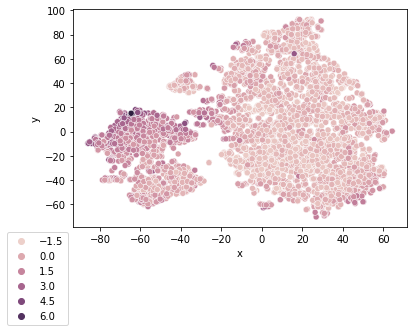

In [62]:
for perplexity in [30]:
    wine_copy = wine_full.copy()
    y = wine_copy.quality
    X = wine_copy.drop('quality', axis=1)
    tsne = TSNE(perplexity=perplexity, random_state=86).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    
    wine_copy['mso2'] = wine_feature.mso2
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='volatile acidity' )
    plt.legend(bbox_to_anchor=[0, 0])
    plt.show()

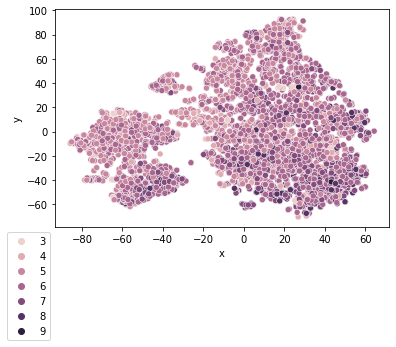

In [63]:
for perplexity in [30]:
    wine_copy = wine_full.copy()
    y = wine_copy.quality
    X = wine_copy.drop('quality', axis=1)
    tsne = TSNE(perplexity=perplexity, random_state=86).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    
    wine_copy['mso2'] = wine_feature.mso2
    sns.scatterplot(data=wine_copy, x='x', y='y', hue=y )
    plt.legend(bbox_to_anchor=[0, 0])
    plt.show()

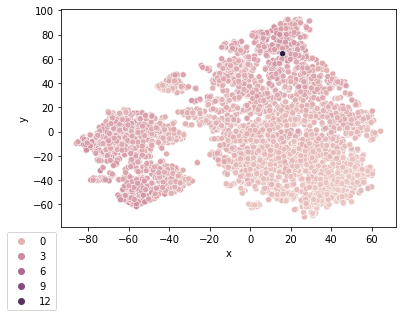

In [64]:
for perplexity in [30]:
    wine_copy = wine_full.copy()
    y = wine_copy.quality
    X = wine_copy.drop('quality', axis=1)
    tsne = TSNE(perplexity=perplexity, random_state=86).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    
    wine_copy['mso2'] = wine_feature.mso2
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='density' )
    plt.legend(bbox_to_anchor=[0, 0])
    plt.show()

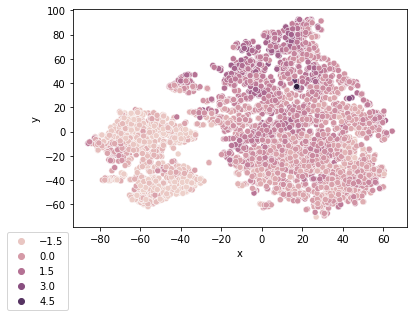

In [65]:
for perplexity in [30]:
    wine_copy = wine_full.copy()
    y = wine_copy.quality
    X = wine_copy.drop('quality', axis=1)
    tsne = TSNE(perplexity=perplexity, random_state=86).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    
    wine_copy['mso2'] = wine_feature.mso2
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='total sulfur dioxide' )
    plt.legend(bbox_to_anchor=[0, 0])
    plt.show()

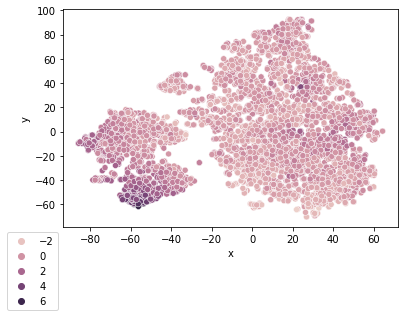

In [66]:
for perplexity in [30]:
    wine_copy = wine_full.copy()
    y = wine_copy.quality
    X = wine_copy.drop('quality', axis=1)
    tsne = TSNE(perplexity=perplexity, random_state=86).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    
    wine_copy['mso2'] = wine_feature.mso2
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='fixed acidity' )
    plt.legend(bbox_to_anchor=[0, 0])
    plt.show()

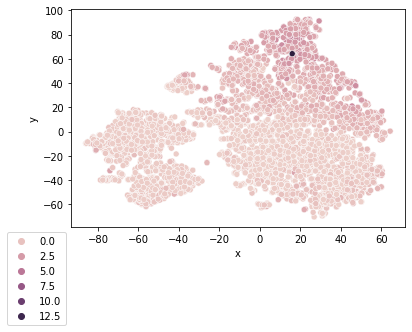

In [67]:
for perplexity in [30]:
    wine_copy = wine_full.copy()
    y = wine_copy.quality
    X = wine_copy.drop('quality', axis=1)
    tsne = TSNE(perplexity=perplexity, random_state=86).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    
    wine_copy['mso2'] = wine_feature.mso2
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='residual sugar' )
    plt.legend(bbox_to_anchor=[0, 0])
    plt.show()

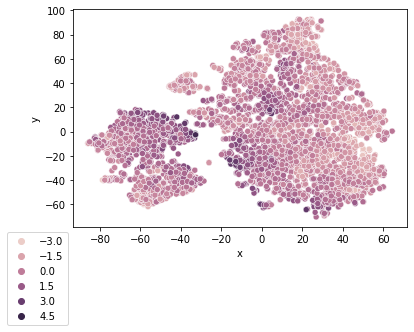

In [68]:
for perplexity in [30]:
    wine_copy = wine_full.copy()
    y = wine_copy.quality
    X = wine_copy.drop('quality', axis=1)
    tsne = TSNE(perplexity=perplexity, random_state=86).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    
    wine_copy['mso2'] = wine_feature.mso2
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='pH' )
    plt.legend(bbox_to_anchor=[0, 0])
    plt.show()

In [99]:
red = pd.read_csv('data/winequality-red.csv', sep=';')

In [100]:
red['mso2'] = red['free sulfur dioxide'] / (1 + 10**(red['pH'] - 1.81))
red['type'] = 0
red.drop_duplicates(inplace=True)

In [101]:
white = pd.read_csv('data/winequality-white.csv', sep=';')
white['type'] = 1

In [102]:
white['mso2'] = white['free sulfur dioxide'] / (1 + 10**(white['pH'] - 1.81))
white.drop_duplicates(inplace=True)

In [103]:
red_white_s = pd.concat([red, white], axis=0)
red_white_s.reset_index(drop=True, inplace=True)
# red_white_s = red_white_s.sample(frac=1).reset_index(drop=True) # Shuffle dataframe
donotscale = ['quality', 'type']
X = red_white_s.drop(donotscale, axis=1)
cols = X.columns
y = red_white_s.quality
t = red_white_s.type
X = StandardScaler().fit_transform(X)
red_white = pd.DataFrame(X, columns=cols)
red_white['quality'] = y
red_white['type'] = t
red_white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.140064          2.115349    -2.164515       -0.699699   0.523880   
1          0.443199          3.185297    -2.164515       -0.544135   1.120736   
2          0.443199          2.471998    -1.892672       -0.610806   0.957957   
3          3.019841         -0.381197     1.641293       -0.699699   0.496751   
4          0.140064          1.877583    -2.164515       -0.721923   0.496751   
...             ...               ...          ...             ...        ...   
5315      -0.769339         -0.797288    -0.193650       -0.766370  -0.479922   
5316      -0.466204         -0.143431     0.282076        0.655929  -0.262884   
5317      -0.541988         -0.618963    -0.873259       -0.855263  -0.425662   
5318      -1.299824         -0.321755    -0.125689       -0.877487  -0.941128   
5319      -0.920906         -0.797288     0.417998       -0.944157  -0.995388   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -1.069272             -1.411143  1.100996  1.779304   
1               -0.282905             -0.829839  0.763753 -0.153797   
2               -0.844596             -1.058837  0.831202  0.220351   
3               -0.732258             -0.953146  1.168444 -0.403229   
4               -0.956934             -1.305451  1.100996  1.779304   
...                   ...                   ...       ...       ...   
5315            -0.339074             -0.389457 -1.145039  0.282710   
5316             1.514508              0.949305  0.122993 -0.465588   
5317            -0.002059             -0.054766 -0.672899 -1.463317   
5318            -0.563750             -0.072382 -1.971283  0.719216   
5319            -0.451412             -0.283765 -1.728468  0.220351   

      sulphates   alcohol      mso2  quality  type  
0      0.177941 -0.969152 -1.124492        5     0  
1      0.979389 -0.631833 -0.262528        5     0  
2      0.779027 -0.631833 -0.787116        5     0  
3      0.311515 -0.631833 -0.546717        6     0  
4      0.177941 -0.969152 -1.080316        5     0  
...         ...       ...       ...      ...   ...  
5315  -0.222784  0.548783 -0.459337        6     1  
5316  -0.489933 -0.800493  1.445744        5     1  
5317  -0.489933 -0.969152  0.731832        6     1  
5318  -1.024232  1.898059 -0.720116        7     1  
5319  -1.424957  1.054761 -0.516288        6     1  

[5320 rows x 14 columns]

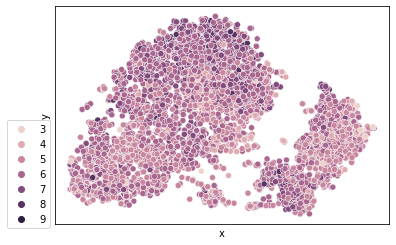

In [74]:
for perplexity in [50]:
    t = red_white.type
    q = red_white.quality
    wine_copy = red_white.drop(['type','quality'], axis=1)
    X = wine_copy.copy()
    tsne = TSNE(perplexity=perplexity, random_state=1).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    wine_copy['type'] = t
    wine_copy['quality'] = q
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='quality')
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.show()

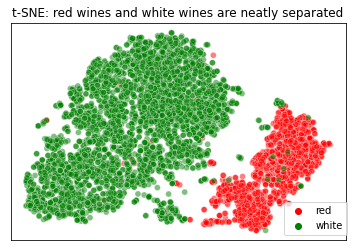

In [188]:
for perplexity in [50]:
    fig, ax = plt.figsize=(15, 12)
    t = red_white.type
    q = red_white.quality
    wine_copy = red_white.drop(['type','quality'], axis=1)
    X = wine_copy.copy()
    tsne = TSNE(perplexity=perplexity, random_state=1).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    wine_copy['type'] = t
    wine_copy['quality'] = q
    dict_replace = {0: 'red', 1: 'white'}
    wine_copy.type = wine_copy.type.replace(dict_replace)
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='type', alpha=0.5,
                   palette=['red', 'green'])
    plt.legend(bbox_to_anchor=[0.8, 0.2])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.title('t-SNE: red wines and white wines are neatly separated')
    plt.savefig('visuals/tsne_full_type.png')
    plt.show()

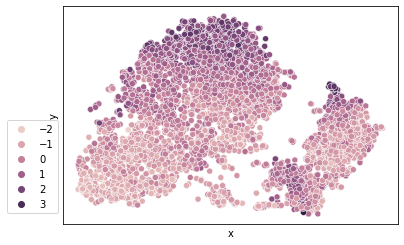

In [76]:
for perplexity in [50]:
    t = red_white.type
    q = red_white.quality
    wine_copy = red_white.drop(['type','quality'], axis=1)
    X = wine_copy.copy()
    tsne = TSNE(perplexity=perplexity, random_state=1).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    wine_copy['type'] = t
    wine_copy['quality'] = q
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='alcohol', )
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.show()

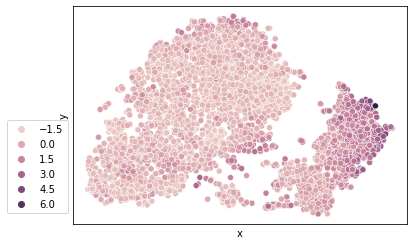

In [77]:
for perplexity in [50]:
    t = red_white.type
    q = red_white.quality
    wine_copy = red_white.drop(['type','quality'], axis=1)
    X = wine_copy.copy()
    tsne = TSNE(perplexity=perplexity, random_state=1).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    wine_copy['type'] = t
    wine_copy['quality'] = q
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='volatile acidity', )
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.show()

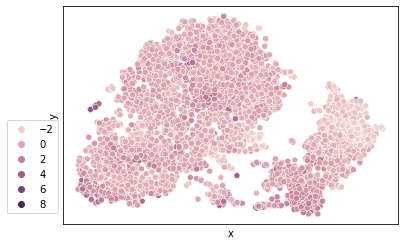

In [78]:
for perplexity in [50]:
    t = red_white.type
    q = red_white.quality
    wine_copy = red_white.drop(['type','quality'], axis=1)
    X = wine_copy.copy()
    tsne = TSNE(perplexity=perplexity, random_state=1).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    wine_copy['type'] = t
    wine_copy['quality'] = q
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='citric acid', )
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.show()

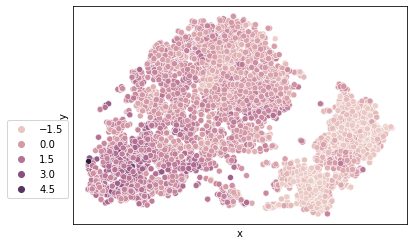

In [79]:
for perplexity in [50]:
    t = red_white.type
    q = red_white.quality
    wine_copy = red_white.drop(['type','quality'], axis=1)
    X = wine_copy.copy()
    tsne = TSNE(perplexity=perplexity, random_state=1).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    wine_copy['type'] = t
    wine_copy['quality'] = q
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='total sulfur dioxide', )
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.show()

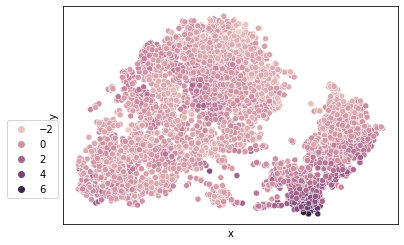

In [80]:
for perplexity in [50]:
    t = red_white.type
    q = red_white.quality
    wine_copy = red_white.drop(['type','quality'], axis=1)
    X = wine_copy.copy()
    tsne = TSNE(perplexity=perplexity, random_state=1).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    wine_copy['type'] = t
    wine_copy['quality'] = q
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='fixed acidity', )
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.show()

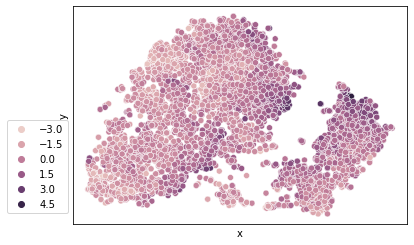

In [81]:
for perplexity in [50]:
    t = red_white.type
    q = red_white.quality
    wine_copy = red_white.drop(['type','quality'], axis=1)
    X = wine_copy.copy()
    tsne = TSNE(perplexity=perplexity, random_state=1).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    wine_copy['type'] = t
    wine_copy['quality'] = q
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='pH', )
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.show()

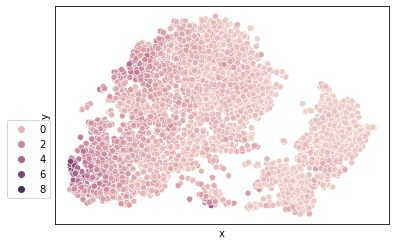

In [82]:
for perplexity in [50]:
    t = red_white.type
    q = red_white.quality
    wine_copy = red_white.drop(['type','quality'], axis=1)
    X = wine_copy.copy()
    tsne = TSNE(perplexity=perplexity, random_state=1).fit_transform(X)
    wine_copy['x'] = tsne[:, 0]
    wine_copy['y'] = tsne[:, 1]
    wine_copy['type'] = t
    wine_copy['quality'] = q
    sns.scatterplot(data=wine_copy, x='x', y='y', hue='mso2', )
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [83]:
# white
white = red_white[red_white.type == 1]
white.drop(['type'], axis=1, inplace=True)

C:\Users\maart\miniconda3\envs\tf\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


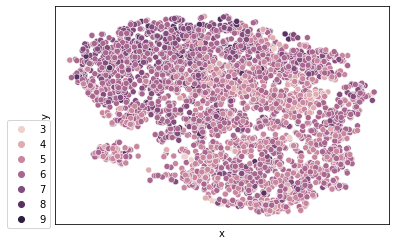

In [84]:
for perplexity in [50]:
    q = white.quality
    X = white.drop('quality', axis=1)
    tsne = TSNE(perplexity=perplexity, random_state=1).fit_transform(X)
    X['x'] = tsne[:, 0]
    X['y'] = tsne[:, 1]
    X['quality'] = q
    sns.scatterplot(data=X, x='x', y='y', hue='quality')
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.show()

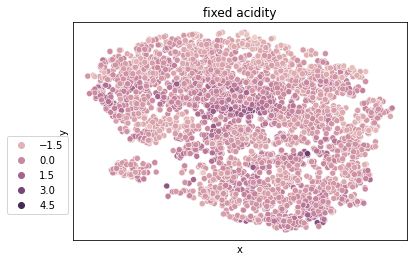

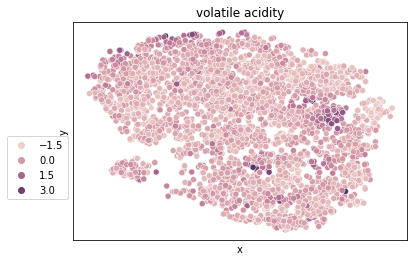

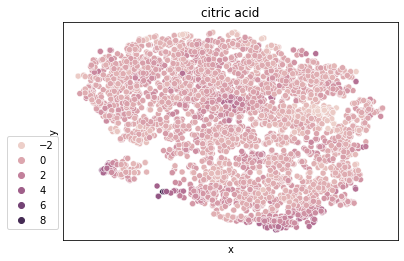

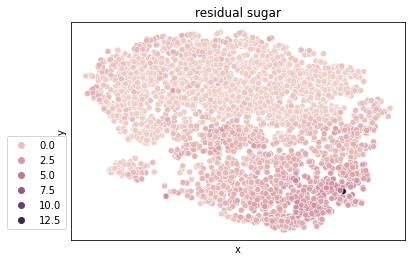

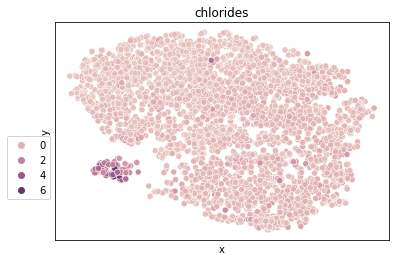

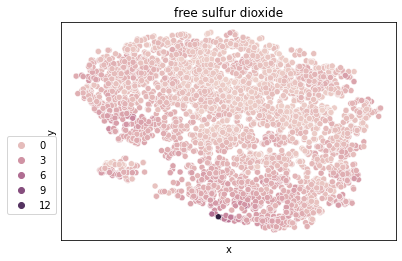

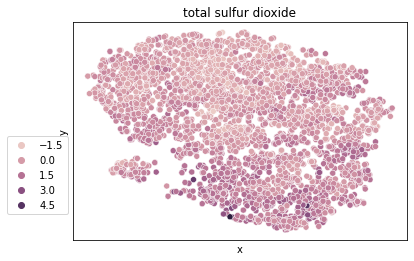

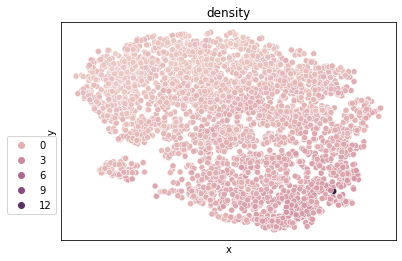

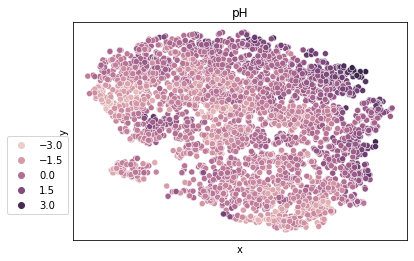

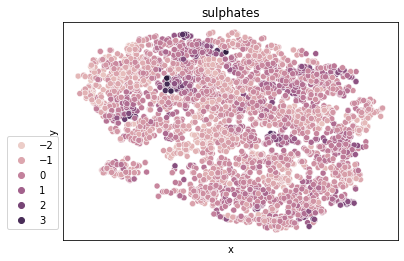

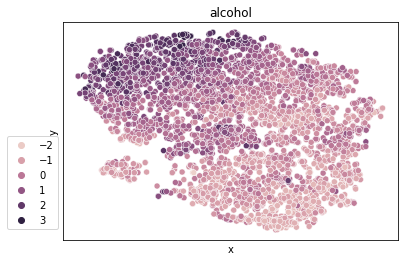

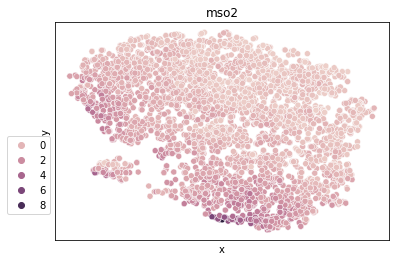

In [85]:
cols = white.drop(['quality'], axis=1).columns
for column in cols:
    q = white.quality
    X = white.drop('quality', axis=1)
    tsne = TSNE(perplexity=perplexity, random_state=1).fit_transform(X)
    X['x'] = tsne[:, 0]
    X['y'] = tsne[:, 1]
    X['quality'] = q
    sns.scatterplot(data=X, x='x', y='y', hue=column)
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.title(column)
    plt.show()

In [86]:
cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'mso2'],
      dtype='object')

In [87]:
# red
red = red_white[red_white.type == 0]
red.drop(['type'], axis=1, inplace=True)

C:\Users\maart\miniconda3\envs\tf\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


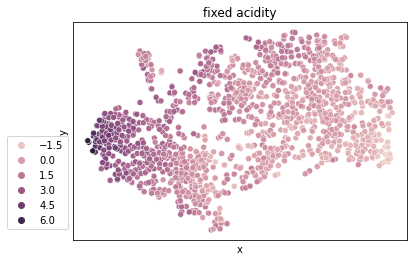

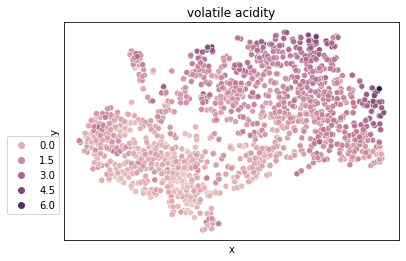

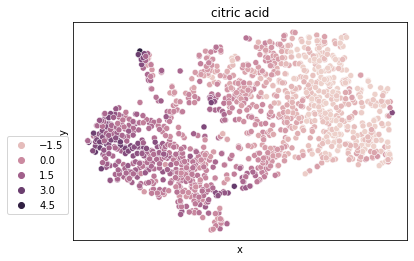

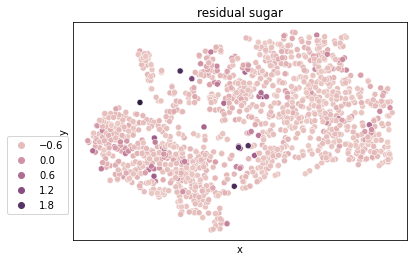

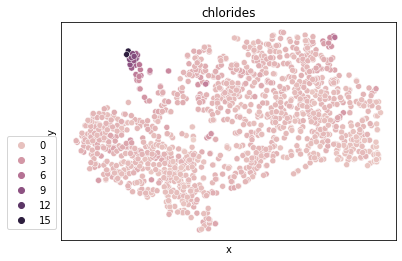

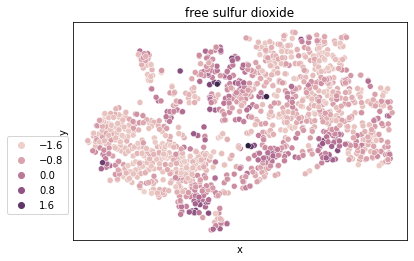

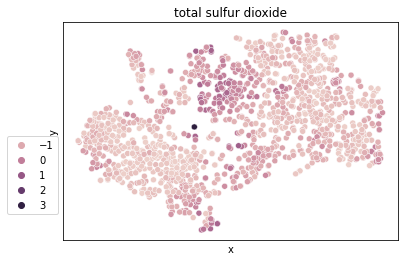

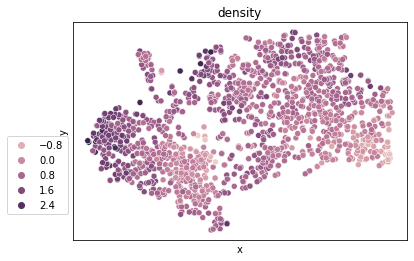

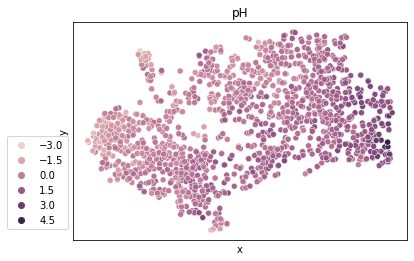

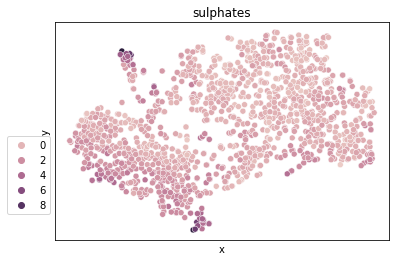

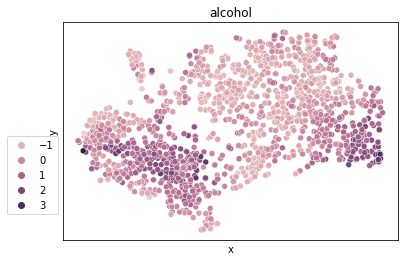

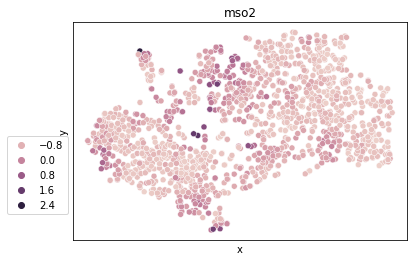

In [88]:
for column in cols:
    q = red.quality
    X = red.drop('quality', axis=1)
    tsne = TSNE(perplexity=50, random_state=11).fit_transform(X)
    X['x'] = tsne[:, 0]
    X['y'] = tsne[:, 1]
    X['quality'] = q
    sns.scatterplot(data=X, x='x', y='y', hue=column)
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.title(column)
    plt.show()

In [104]:
# take a look at quality 6 
df6 = red_white[red_white.quality == 6]
df6

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3          3.019841         -0.381197     1.641293       -0.699699   0.496751   
17         0.518982         -0.143431     1.301489       -0.721923   7.713275   
18         1.276818         -0.737846     1.097606       -0.721923   0.551010   
22        -0.238854          0.332102    -1.213063       -0.588582   0.768048   
26         0.443199          1.788420    -2.164515       -0.677476   0.686659   
...             ...               ...          ...             ...        ...   
5312      -0.845123         -0.024548    -0.193650       -0.633029  -0.561311   
5313      -1.148257         -0.797288     0.010232       -0.921934  -0.507052   
5315      -0.769339         -0.797288    -0.193650       -0.766370  -0.479922   
5317      -0.541988         -0.618963    -0.873259       -0.855263  -0.425662   
5319      -0.920906         -0.797288     0.417998       -0.944157  -0.995388   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3               -0.732258             -0.953146  1.168444 -0.403229   
17              -0.732258             -1.023607  0.797477 -1.151526   
18              -0.058228             -0.953146  0.763753  1.031007   
22              -0.507581             -1.305451  0.763753  1.280439   
26              -1.237780             -1.728218  0.628856  0.968648   
...                   ...                   ...       ...       ...   
5312            -0.282905             -0.248534 -1.738585 -1.026810   
5313             0.447294              0.121387 -1.279936  0.095635   
5315            -0.339074             -0.389457 -1.145039  0.282710   
5317            -0.002059             -0.054766 -0.672899 -1.463317   
5319            -0.451412             -0.283765 -1.728468  0.220351   

      sulphates   alcohol      mso2  quality  type  
3      0.311515 -0.631833 -0.546717        6     0  
17     3.650885 -1.137811 -0.300035        6     0  
18    -0.022421 -0.969152 -0.528272        6     0  
22     0.645452 -0.716163 -0.811989        6     0  
26     0.378303 -0.631833 -1.130709        6     0  
...         ...       ...       ...      ...   ...  
5312  -0.623508  1.054761  0.135394        6     1  
5313  -0.489933  0.042805  0.169553        6     1  
5315  -0.222784  0.548783 -0.459337        6     1  
5317  -0.489933 -0.969152  0.731832        6     1  
5319  -1.424957  1.054761 -0.516288        6     1  

[2323 rows x 14 columns]

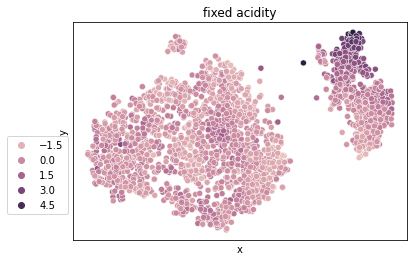

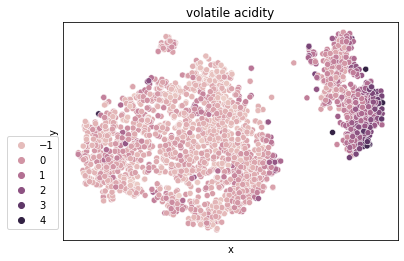

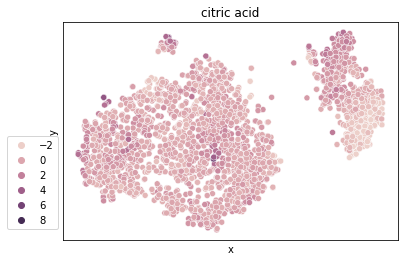

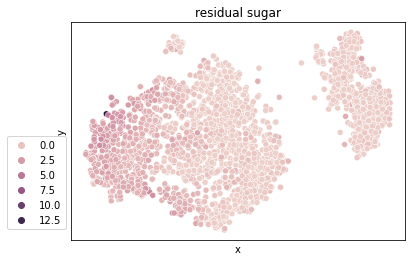

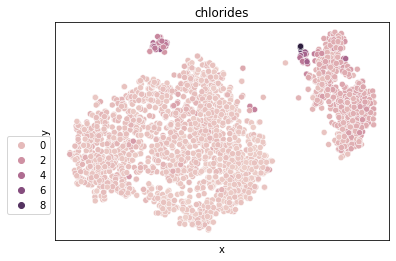

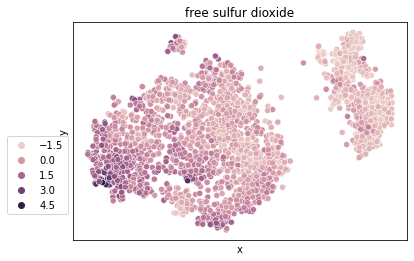

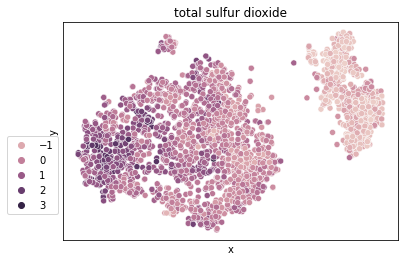

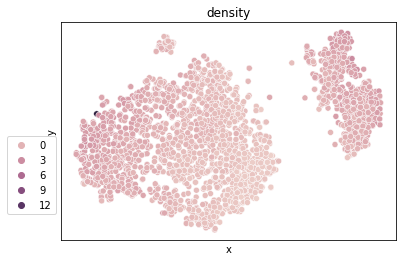

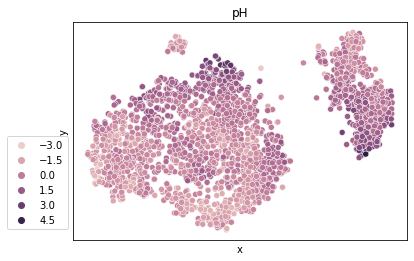

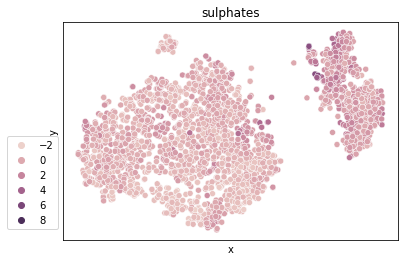

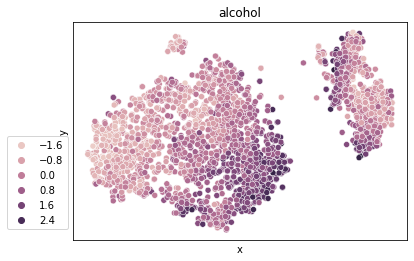

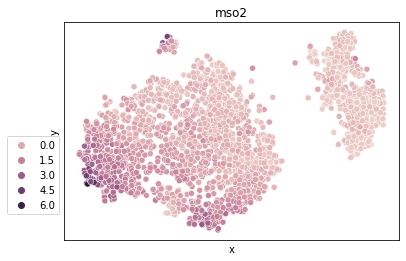

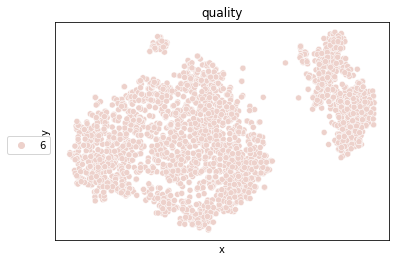

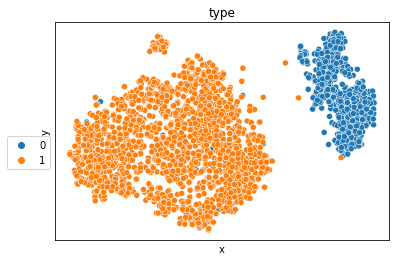

In [90]:
cols = df6.columns
for column in cols:
    q = df6.quality
    X = df6.drop('quality', axis=1)
    tsne = TSNE(perplexity=50, random_state=42).fit_transform(X) #11
    X['x'] = tsne[:, 0]
    X['y'] = tsne[:, 1]
    X['quality'] = q
    sns.scatterplot(data=X, x='x', y='y', hue=column)
    plt.legend(bbox_to_anchor=[0, 0.5])
    plt.xticks([])
    plt.yticks([])
    plt.title(column)
    plt.show()

In [105]:
# which group is 5 and which is 7? 
df567 = red_white[red_white.quality.isin([5,6,7])]
df567

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.140064          2.115349    -2.164515       -0.699699   0.523880   
1          0.443199          3.185297    -2.164515       -0.544135   1.120736   
2          0.443199          2.471998    -1.892672       -0.610806   0.957957   
3          3.019841         -0.381197     1.641293       -0.699699   0.496751   
4          0.140064          1.877583    -2.164515       -0.721923   0.496751   
...             ...               ...          ...             ...        ...   
5315      -0.769339         -0.797288    -0.193650       -0.766370  -0.479922   
5316      -0.466204         -0.143431     0.282076        0.655929  -0.262884   
5317      -0.541988         -0.618963    -0.873259       -0.855263  -0.425662   
5318      -1.299824         -0.321755    -0.125689       -0.877487  -0.941128   
5319      -0.920906         -0.797288     0.417998       -0.944157  -0.995388   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -1.069272             -1.411143  1.100996  1.779304   
1               -0.282905             -0.829839  0.763753 -0.153797   
2               -0.844596             -1.058837  0.831202  0.220351   
3               -0.732258             -0.953146  1.168444 -0.403229   
4               -0.956934             -1.305451  1.100996  1.779304   
...                   ...                   ...       ...       ...   
5315            -0.339074             -0.389457 -1.145039  0.282710   
5316             1.514508              0.949305  0.122993 -0.465588   
5317            -0.002059             -0.054766 -0.672899 -1.463317   
5318            -0.563750             -0.072382 -1.971283  0.719216   
5319            -0.451412             -0.283765 -1.728468  0.220351   

      sulphates   alcohol      mso2  quality  type  
0      0.177941 -0.969152 -1.124492        5     0  
1      0.979389 -0.631833 -0.262528        5     0  
2      0.779027 -0.631833 -0.787116        5     0  
3      0.311515 -0.631833 -0.546717        6     0  
4      0.177941 -0.969152 -1.080316        5     0  
...         ...       ...       ...      ...   ...  
5315  -0.222784  0.548783 -0.459337        6     1  
5316  -0.489933 -0.800493  1.445744        5     1  
5317  -0.489933 -0.969152  0.731832        6     1  
5318  -1.024232  1.898059 -0.720116        7     1  
5319  -1.424957  1.054761 -0.516288        6     1  

[4931 rows x 14 columns]

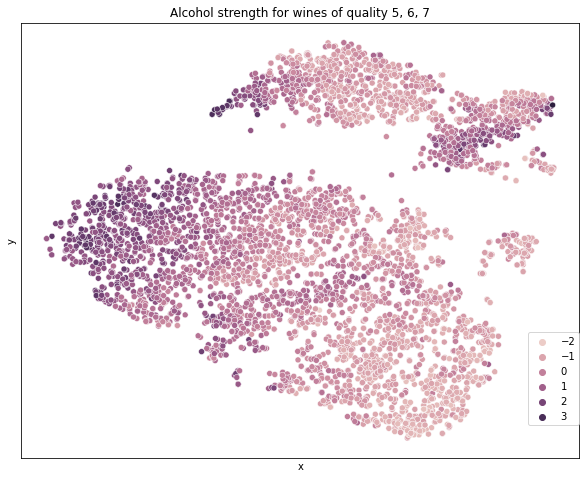

In [194]:
cols = df567.columns
for column in ['alcohol']:
    fig, ax = plt.subplots(figsize=(10, 8))
    q = df567.quality
    X = df567.drop('quality', axis=1)
    tsne = TSNE(perplexity=50, random_state=42).fit_transform(X) #11
    X['x'] = tsne[:, 0]
    X['y'] = tsne[:, 1]
    X['quality'] = q
    sns.scatterplot(data=X, x='x', y='y', hue=column)
    plt.legend(bbox_to_anchor=[0.9, 0.3])
    plt.xticks([])
    plt.yticks([])
    title_string = 'Alcohol strength for wines of quality 5, 6, 7'
    plt.title(title_string)
    plt.savefig('visuals/tsne_567_alcohol.png')
    plt.show()

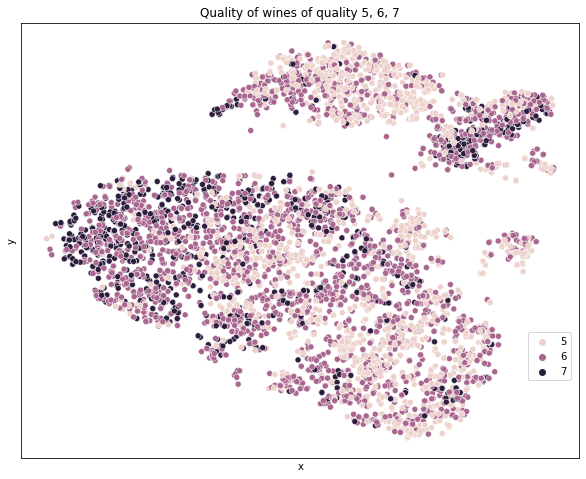

In [195]:
for column in ['quality']:
    fig, ax = plt.subplots(figsize=(10, 8))
    q = df567.quality
    X = df567.drop('quality', axis=1)
    tsne = TSNE(perplexity=50, random_state=42).fit_transform(X) #11
    X['x'] = tsne[:, 0]
    X['y'] = tsne[:, 1]
    X['quality'] = q
    sns.scatterplot(data=X, x='x', y='y', hue=column)
    plt.legend(bbox_to_anchor=[0.9, 0.3])
    plt.xticks([])
    plt.yticks([])
    title_string = 'Quality of wines of quality 5, 6, 7'
    plt.title(title_string)
    plt.savefig('visuals/tsne_567_quality.png')
    plt.show()

In [112]:
# divide 6 into two: +- and 6+
# tsne shows alcohol is perfect for this division: if alcohol >=1, then 6+ good, else +- bad. 
# count this
mask_up = df6.alcohol > -0.45
mask_down = df6.alcohol <= -0.45
# print(mask.value_counts())    # False: 1885, True: 438
column_name = 'quality'
df_test = df6.copy()
df_test.loc[mask_up, column_name] = 6.9
df_test.loc[mask_down, column_name] = 5.1
df_test.quality.value_counts()

6.9    1520
5.1     803
Name: quality, dtype: int64

In [208]:
red_white.alcohol.max()

In [210]:
red_white.alcohol.min()

-2.1497681626449947

In [113]:
alcohol_boundary = -0.45
mask_up = (red_white.quality==6) & (red_white.alcohol > alcohol_boundary)
mask_down = (red_white.quality==6) & (red_white.alcohol <= alcohol_boundary)

In [114]:
column = 'quality'
idx_up = red_white[mask_up].quality.index
idx_down = red_white[mask_down].quality.index

In [115]:
red_white.loc[idx_up, 'quality'] = 6.5
red_white.loc[idx_down, 'quality'] = 5.5
red_white.quality.value_counts()

5.0    1752
6.5    1520
7.0     856
5.5     803
4.0     206
8.0     148
3.0      30
9.0       5
Name: quality, dtype: int64

In [116]:
red_white_binary = red_white.copy()

In [117]:
threshold = 6
red_white_binary.loc[red_white_binary.quality < threshold, 'quality'] = 0
red_white_binary.loc[red_white_binary.quality > threshold, 'quality'] = 1

In [118]:
red_white_binary.quality.value_counts()

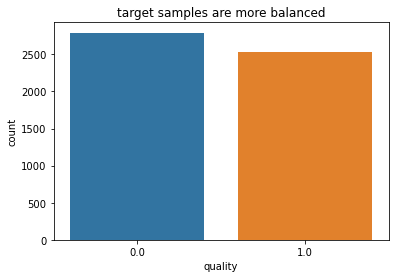

In [199]:
plt.figsize=(12,8)
sns.countplot(x='quality', data=red_white_binary)
plt.title('target samples are more balanced')
plt.savefig('visuals/split_quality_binary.png')

In [119]:
import tensorflow as tf

In [275]:
X = red_white_binary.drop('quality', axis=1)
y = red_white_binary.quality

In [276]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [277]:
number_of_neurons = 40
learning_rate = 0.0033

model = keras.models.Sequential([
        keras.layers.Dense(number_of_neurons, input_shape=(13,), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

checkpoint_callback = keras.callbacks.ModelCheckpoint('bestonly_type_balanced.h5', save_best_only=True,
                                                       monitor='val_accuracy')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
                        # callbacks=[keras.callbacks.EarlyStopping(patience=10)])
                        callbacks=[checkpoint_callback, keras.callbacks.EarlyStopping(patience=30,
                                                                                      monitor='val_accuracy')])

y_pred = (model.predict(X_test) > 0.5).astype("int32")
results = model.evaluate(X_train, y_train, batch_size=32)
print('train:', results)
results = model.evaluate(X_val, y_val, batch_size=32)
print('val:', results)
results = model.evaluate(X_test, y_test, batch_size=32)
print(f"Accuracy on test set is {results[1] * 100:.2f}%")

Epoch 1/100
107/107 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.7949 - val_loss: 0.3900 - val_accuracy: 0.8451
Epoch 2/100
107/107 [==============================] - 0s 645us/step - loss: 0.3579 - accuracy: 0.8481 - val_loss: 0.3773 - val_accuracy: 0.8451
Epoch 3/100
107/107 [==============================] - 0s 701us/step - loss: 0.3459 - accuracy: 0.8528 - val_loss: 0.3771 - val_accuracy: 0.8462
Epoch 4/100
107/107 [==============================] - 0s 738us/step - loss: 0.3393 - accuracy: 0.8552 - val_loss: 0.3751 - val_accuracy: 0.8498
Epoch 5/100
107/107 [==============================] - 0s 682us/step - loss: 0.3353 - accuracy: 0.8575 - val_loss: 0.3761 - val_accuracy: 0.8462
Epoch 6/100
107/107 [==============================] - 0s 720us/step - loss: 0.3344 - accuracy: 0.8596 - val_loss: 0.3734 - val_accuracy: 0.8521
Epoch 7/100
107/107 [==============================] - 0s 673us/step - loss: 0.3307 - accuracy: 0.8613 - val_loss: 0.3747 - val_accu

In [278]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
results = model.evaluate(X_train, y_train, batch_size=32)
print('train:', results)
results = model.evaluate(X_val, y_val, batch_size=32)
print('val:', results)
results = model.evaluate(X_test, y_test, batch_size=32)
print(f"Accuracy on test set is {results[1] * 100:.2f}%")
print(classification_report(y_test, y_pred))
print(tf.math.confusion_matrix(y_test, y_pred))

107/107 [==============================] - 0s 402us/step - loss: 0.2744 - accuracy: 0.8845
train: [0.2744252383708954, 0.8845475912094116]
27/27 [==============================] - 0s 407us/step - loss: 0.3700 - accuracy: 0.8486
val: [0.36996394395828247, 0.8485915660858154]
34/34 [==============================] - 0s 412us/step - loss: 0.3244 - accuracy: 0.8797
Accuracy on test set is 87.97%
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88       558
         1.0       0.85      0.90      0.88       506

    accuracy                           0.88      1064
   macro avg       0.88      0.88      0.88      1064
weighted avg       0.88      0.88      0.88      1064

tf.Tensor(
[[480  78]
 [ 50 456]], shape=(2, 2), dtype=int32)


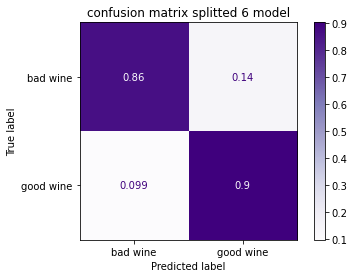

In [279]:
labels = ['bad wine', 'good wine']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, normalize='true'), display_labels=labels)
disp.plot(cmap=plt.cm.Purples)
plt.title('confusion matrix splitted 6 model')
plt.savefig('visuals/split_confusionmatrix.png')
plt.show()

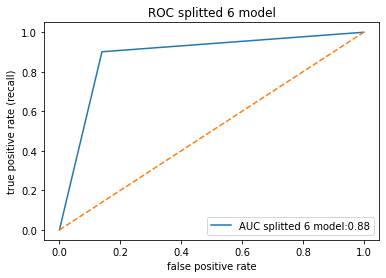

In [280]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend()

roc_auc = round(roc_auc_score(y_test, y_pred), 2)
label_string = 'AUC splitted 6 model:' + str(roc_auc)
plot_roc_curve(false_pos_rate, true_pos_rate, label=label_string)
plt.title('ROC splitted 6 model')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate (recall)')
plt.savefig('visuals/split_roccurve.png')
plt.show()

No handles with labels found to put in legend.


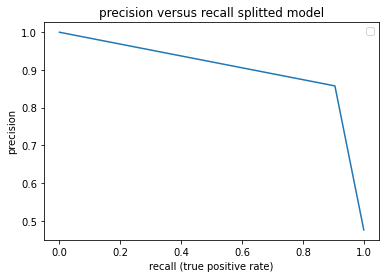

In [204]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_roc_curve, roc_curve, roc_auc_score, precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
#     plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.plot(recalls, precisions)
    
    plt.legend()


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.title('precision versus recall splitted model')
plt.xlabel('recall (true positive rate)')
plt.ylabel('precision')
plt.savefig('visuals/split_precisionrecall.png')
plt.show()

In [165]:
red_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'mso2', 'quality', 'type'],
      dtype='object')

In [364]:
X = red_white_binary.drop(['quality', 'mso2','pH','residual sugar', 'density', 'type', 
                           'chlorides'
#                            , 'fixed acidity', 'volatile acidity', 'citric acid'
                          ]
                          , axis=1)
y = red_white_binary.quality
input_shape = len(X.columns)

In [371]:
for column in X.columns:
    print(column)

fixed acidity
volatile acidity
citric acid
free sulfur dioxide
total sulfur dioxide
sulphates
alcohol


In [365]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [366]:
number_of_neurons = 40
learning_rate = 0.0033
model5 = None

In [367]:
model5= keras.models.Sequential([
        keras.layers.Dense(number_of_neurons, input_shape=(input_shape,), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

model5.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

checkpoint_callback = keras.callbacks.ModelCheckpoint('bestonly_type_balanced.h5', save_best_only=True,
                                                       monitor='val_accuracy')
history = model5.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val),
                        # callbacks=[keras.callbacks.EarlyStopping(patience=10)])
                        callbacks=[checkpoint_callback, keras.callbacks.EarlyStopping(patience=30,
                                                                                      monitor='val_accuracy')])

y_pred = (model5.predict(X_test) > 0.5).astype("int32")
results = model5.evaluate(X_train, y_train, batch_size=32)
print('train:', results)
results = model5.evaluate(X_val, y_val, batch_size=32)
print('val:', results)
results = model5.evaluate(X_test, y_test, batch_size=32)
print(f"Accuracy on test set is {results[1] * 100:.2f}%")

Epoch 1/200
107/107 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.7961 - val_loss: 0.3833 - val_accuracy: 0.8380
Epoch 2/200
107/107 [==============================] - 0s 692us/step - loss: 0.3559 - accuracy: 0.8475 - val_loss: 0.3771 - val_accuracy: 0.8392
Epoch 3/200
107/107 [==============================] - 0s 692us/step - loss: 0.3463 - accuracy: 0.8555 - val_loss: 0.3767 - val_accuracy: 0.8462
Epoch 4/200
107/107 [==============================] - 0s 617us/step - loss: 0.3450 - accuracy: 0.8528 - val_loss: 0.3775 - val_accuracy: 0.8392
Epoch 5/200
107/107 [==============================] - 0s 682us/step - loss: 0.3411 - accuracy: 0.8608 - val_loss: 0.3772 - val_accuracy: 0.8498
Epoch 6/200
107/107 [==============================] - 0s 645us/step - loss: 0.3391 - accuracy: 0.8558 - val_loss: 0.3749 - val_accuracy: 0.8498
Epoch 7/200
107/107 [==============================] - 0s 617us/step - loss: 0.3361 - accuracy: 0.8561 - val_loss: 0.3809 - val_accu

In [368]:
y_pred = (model5.predict(X_test) > 0.5).astype("int32")
print(tf.math.confusion_matrix(y_test, y_pred))

tf.Tensor(
[[479  79]
 [ 51 455]], shape=(2, 2), dtype=int32)


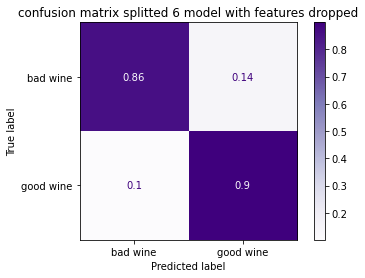

In [369]:
labels = ['bad wine', 'good wine']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, normalize='true'), display_labels=labels)
disp.plot(cmap=plt.cm.Purples)
plt.title('confusion matrix splitted 6 model with features dropped')
plt.savefig('visuals/drop_try_confusionmatrix.png')
plt.show()

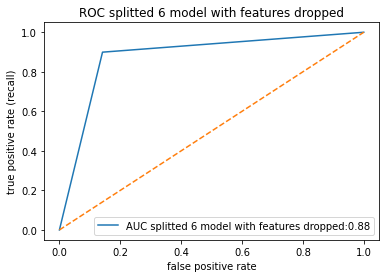

In [370]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend()

roc_auc = round(roc_auc_score(y_test, y_pred), 2)
label_string = 'AUC splitted 6 model with features dropped:' + str(roc_auc)
plot_roc_curve(false_pos_rate, true_pos_rate, label=label_string)
plt.title('ROC splitted 6 model with features dropped')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate (recall)')
plt.savefig('visuals/drop_try_roccurve.png')
plt.show()

In [387]:
models_l = ['base', 'grid', 'feature engineered', 'features dropped']
train_l = [0.772, 0.780, 0.880, 0.867]
validation_l = [0.732, 0.754, 0.844, 0.853]
test_l = [0.751, 0.759, 0.867, 0.878]

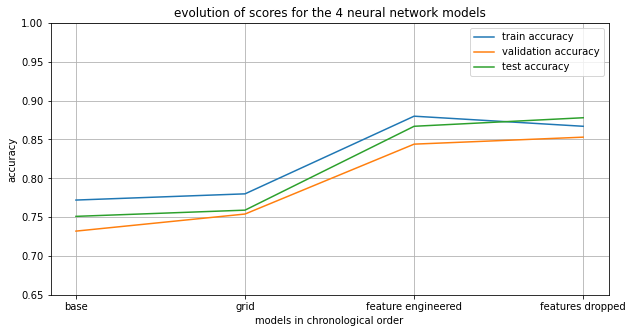

In [447]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(models_l, train_l, label='train accuracy')
plt.plot(models_l, validation_l, label='validation accuracy')
plt.plot(models_l, test_l, label='test accuracy')
plt.title('evolution of scores for the 4 neural network models')
plt.ylim([0.65,1])
plt.grid()
plt.legend()
plt.xlabel('models in chronological order')
plt.ylabel('accuracy')
plt.savefig('visuals/summ_line_accuracies.png')
plt.show()

In [409]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [405]:
wine_binary
X_wine_binary_forest = wine_binary.drop('quality', axis=1)
y_wine_binary_forest = wine_binary.quality

In [411]:
X_train_wbf, X_test_wbf, y_train_wbf, y_test_wbf = train_test_split(X_wine_binary_forest, y_wine_binary_forest, test_size=0.2, stratify=y_wine_binary_forest)
# X_train_wbf, X_val_wbf, y_train_wbf, y_val_wbf = train_test_split(X_train_wbf_full, y_train_wbf, test_size=0.2, stratify=y_train_wbf)

In [422]:
clf_wine_binary = RandomForestClassifier(max_depth=2, random_state=42)

In [423]:
clf_wine_binary.fit(X_train_wbf, y_train_wbf)

RandomForestClassifier(max_depth=2, random_state=42)

In [424]:
clf_wine_binary.score(X_train_wbf, y_train_wbf)

0.7174424071462153

In [425]:
clf_wine_binary.score(X_test_wbf, y_test_wbf)

0.7302631578947368

In [426]:
y_pred = clf_wine_binary.predict(X_test_wbf)

In [427]:
print(classification_report(y_test_wbf, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.41      0.53       398
           1       0.72      0.92      0.81       666

    accuracy                           0.73      1064
   macro avg       0.74      0.67      0.67      1064
weighted avg       0.74      0.73      0.71      1064



In [428]:
# cross validation
# 10-Fold Cross validation
np.mean(cross_val_score(clf_wine_binary, X_train_wbf, y_train_wbf, cv=3))

0.7200282087447109

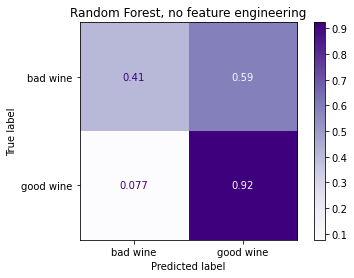

In [446]:
labels = ['bad wine', 'good wine']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_wbf, y_pred, normalize='true'), display_labels=labels)
disp.plot(cmap=plt.cm.Purples)
plt.title('Random Forest, no feature engineering')
plt.savefig('visuals/forest_confusion.png')
plt.show()

In [397]:
red_white_binary_dropped = red_white_binary.drop(['mso2','pH','residual sugar', 'density', 'type', 'chlorides'], axis=1)

In [398]:
red_white_binary_dropped.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [432]:
red_white_binary_dropped

fixed acidity  volatile acidity  citric acid  free sulfur dioxide  \
0          0.140064          2.115349    -2.164515            -1.069272   
1          0.443199          3.185297    -2.164515            -0.282905   
2          0.443199          2.471998    -1.892672            -0.844596   
3          3.019841         -0.381197     1.641293            -0.732258   
4          0.140064          1.877583    -2.164515            -0.956934   
...             ...               ...          ...                  ...   
5315      -0.769339         -0.797288    -0.193650            -0.339074   
5316      -0.466204         -0.143431     0.282076             1.514508   
5317      -0.541988         -0.618963    -0.873259            -0.002059   
5318      -1.299824         -0.321755    -0.125689            -0.563750   
5319      -0.920906         -0.797288     0.417998            -0.451412   

      total sulfur dioxide  sulphates   alcohol  quality  
0                -1.411143   0.177941 -0.969152      0.0  
1                -0.829839   0.979389 -0.631833      0.0  
2                -1.058837   0.779027 -0.631833      0.0  
3                -0.953146   0.311515 -0.631833      0.0  
4                -1.305451   0.177941 -0.969152      0.0  
...                    ...        ...       ...      ...  
5315             -0.389457  -0.222784  0.548783      1.0  
5316              0.949305  -0.489933 -0.800493      0.0  
5317             -0.054766  -0.489933 -0.969152      0.0  
5318             -0.072382  -1.024232  1.898059      1.0  
5319             -0.283765  -1.424957  1.054761      1.0  

[5320 rows x 8 columns]

In [433]:
X_rw_forest = red_white_binary_dropped.drop('quality', axis=1)
y_rw_forest = red_white_binary_dropped.quality

In [434]:
X_train_rw, X_test_rw, y_train_rw, y_test_rw = train_test_split(X_rw_forest, y_rw_forest, test_size=0.2, stratify=y_rw_forest)

In [435]:
clf_rw = RandomForestClassifier(max_depth=2, random_state=42)

In [436]:
clf_rw.fit(X_train_rw, y_train_rw)

RandomForestClassifier(max_depth=2, random_state=42)

In [437]:
clf_rw.score(X_train_rw, y_train_rw)

0.8594924812030075

In [438]:
clf_rw.score(X_test_rw, y_test_rw)

0.8421052631578947

In [439]:
y_pred_rw = clf_rw.predict(X_test_rw)

In [440]:
# cross validation
# 10-Fold Cross validation
np.mean(cross_val_score(clf_rw, X_train_rw, y_train_rw, cv=3))

0.8590213811947666

In [441]:
print(classification_report(y_test_rw, y_pred_rw))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       558
         1.0       0.77      0.96      0.85       506

    accuracy                           0.84      1064
   macro avg       0.86      0.85      0.84      1064
weighted avg       0.86      0.84      0.84      1064



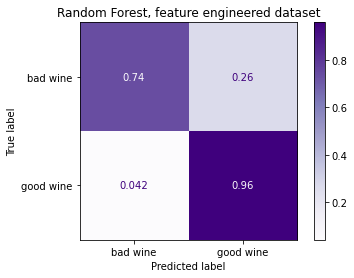

In [445]:
labels = ['bad wine', 'good wine']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_rw, y_pred_rw, normalize='true'), display_labels=labels)
disp.plot(cmap=plt.cm.Purples)
plt.title('Random Forest, feature engineered dataset')
plt.savefig('visuals/forest_confusion_after_feature.png')
plt.show()